In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import os 
os.chdir(r'C:\Users\dell\PycharmProjects\MachineLearning\Pandas\datasets')

## Get data

In [3]:
df = pd.read_csv('housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C814E28828>,
      dtype=object)

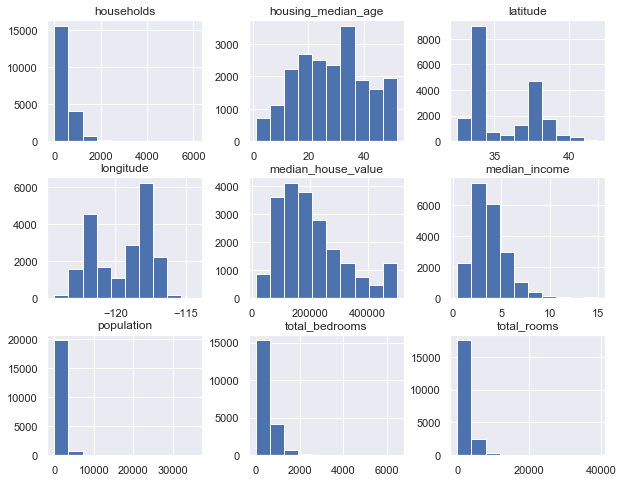

In [6]:
df.hist(figsize = (10, 8))


Categorical column: <code>ocean_proximity</code>

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

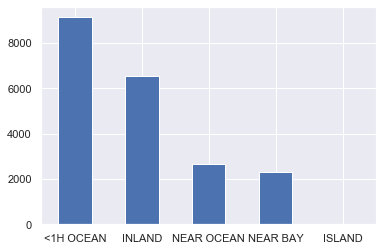

In [8]:
df['ocean_proximity'].value_counts().plot(kind = 'bar', rot = 0)

<span class = 'note'>Analysis:</span><br>
<ol>
    <li>
        First, the median income attribute does not look like it is expressed in US dollars
(USD). After checking with the team that collected the data, you are told that the
data has been scaled and capped at 15 (actually 15.0001) for higher median
incomes, and at 0.5 (actually 0.4999) for lower median incomes. Working with
preprocessed attributes is common in Machine Learning, and it is not necessarily
a problem, but you should try to understand how the data was computed.
    </li>
    <li>
        The housing median age and the median house value were also capped. The lat‐
ter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s out‐
put) to see if this is a problem or not. If they tell you that they need precise pre‐
dictions even beyond 500,000, then you have mainly two options:
a. Collect proper labels for the districts whose labels were capped.
b. Remove those districts from the training set (and also from the test set, since
your system should not be evaluated poorly if it predicts values beyond
$500,000).
    </li>
    <li>
        These attributes have very different scales. We will discuss this later in this chap‐
ter when we explore feature scaling.
    </li>
    <li>
    Finally, many histograms are tail heavy: they extend much farther to the right of
the median than to the left. This may make it a bit harder for some Machine
Learning algorithms to detect patterns. We will try transforming these attributes
later on to have more bell-shaped distributions.
    </li>
</ol>


## Create a test set

<span class = 'warning'>NOTE:</span>
<p class = 'note'> You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.</p>
<p>
So far we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone booth. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is com‐
posed of 51.3% female and 48.7% male, so a well-conducted survey in the US would
try to maintain this ratio in the sample: 513 female and 487 male. This is called strati‐
fied sampling: the population is divided into homogeneous subgroups called strata,
and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population. If they used purely random sam‐
pling, there would be about 12% chance of sampling a skewed test set with either less
than 49% female or more than 54% female. Either way, the survey results would be
significantly biased.
Suppose you chatted with expert
</p>

Let's look at the <code>median_income</code> more closely:

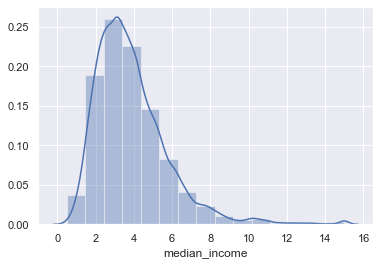

In [9]:
sns.distplot(df['median_income'], bins = 15)

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. 
Most median income values are clustered around 2–5 (tens of thousands of dollars),
but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s
importance may be biased. This means that you should not have too many strata, and
each stratum should be large enough. The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income cate‐
gories), and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5:

In [10]:
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['median_income'] < 5, 5, inplace = True)
df['income_cat'].value_counts() / len(df)

3.0    0.350581
2.0    0.318847
5.0    0.218459
4.0    0.072287
1.0    0.039826
Name: income_cat, dtype: float64

Now you are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s <b>StratifiedShuffleSplit</b> class:


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
# StratifiedShuffleSplit?
split = StratifiedShuffleSplit(n_splits= 1, test_size = .2, random_state = 42)
for index_train, index_test in split.split(df, df['income_cat']):
    print(index_train, index_test)
    train_set, test_set = df.iloc[index_train], df.iloc[index_test]

[17172  5293 14663 ... 14621  9183 11682] [ 6142  5245  9976 ... 12625 12012   387]


Let see the distribution of <code>income_cat</code> in the test set:

In [12]:
test_set['income_cat'].value_counts() / len(test_set)

3.0    0.350533
2.0    0.318798
5.0    0.218508
4.0    0.072432
1.0    0.039729
Name: income_cat, dtype: float64

<span class = 'note'>This is almost equal to the original distribution ratio</span>

Now you should remove the income_cat attribute so the data is back to its original
state:


In [13]:
train_set = train_set.drop(columns = 'income_cat')
test_set = test_set.drop(columns = 'income_cat')

## Discover and Visualize Data to gain insight

### Visualizing Geographical Data

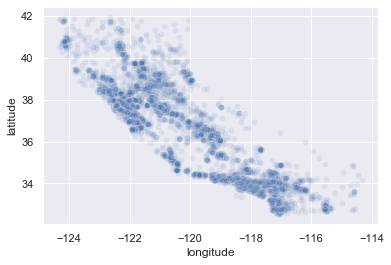

In [20]:
house = train_set.copy()
sns.scatterplot(data = house, x = 'longitude', y = 'latitude')

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points:

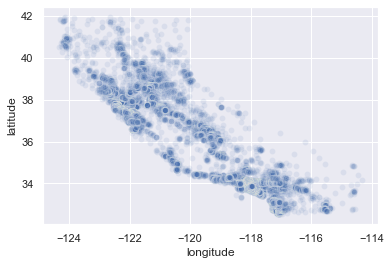

In [22]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', alpha = .1)

Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

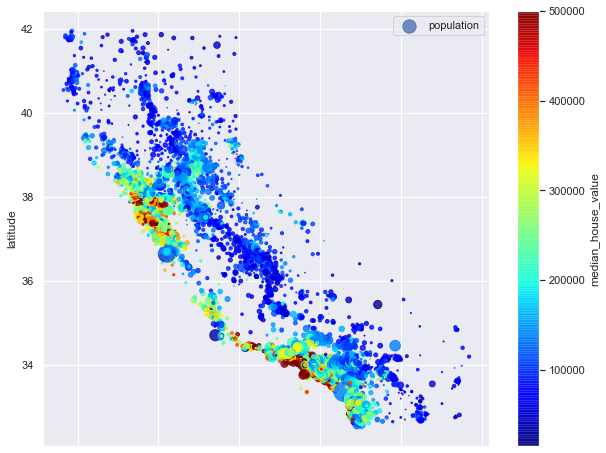

In [42]:
df.plot(kind = 'scatter', x = 'longitude', y = 'latitude', s = df['population'] / 100, c = 'median_house_value', cmap = plt.get_cmap('jet'), label = 'population', figsize = (10,8), alpha = .8)
plt.legend()

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean prox‐
imity attribute may be useful as well, although in Northern California the housing
prices in coastal districts are not too high, so it is not a simple rule

## Looking at Correlations

In [49]:
house.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687752
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
population           -0.024622
longitude            -0.047586
latitude             -0.142814
Name: median_house_value, dtype: float64

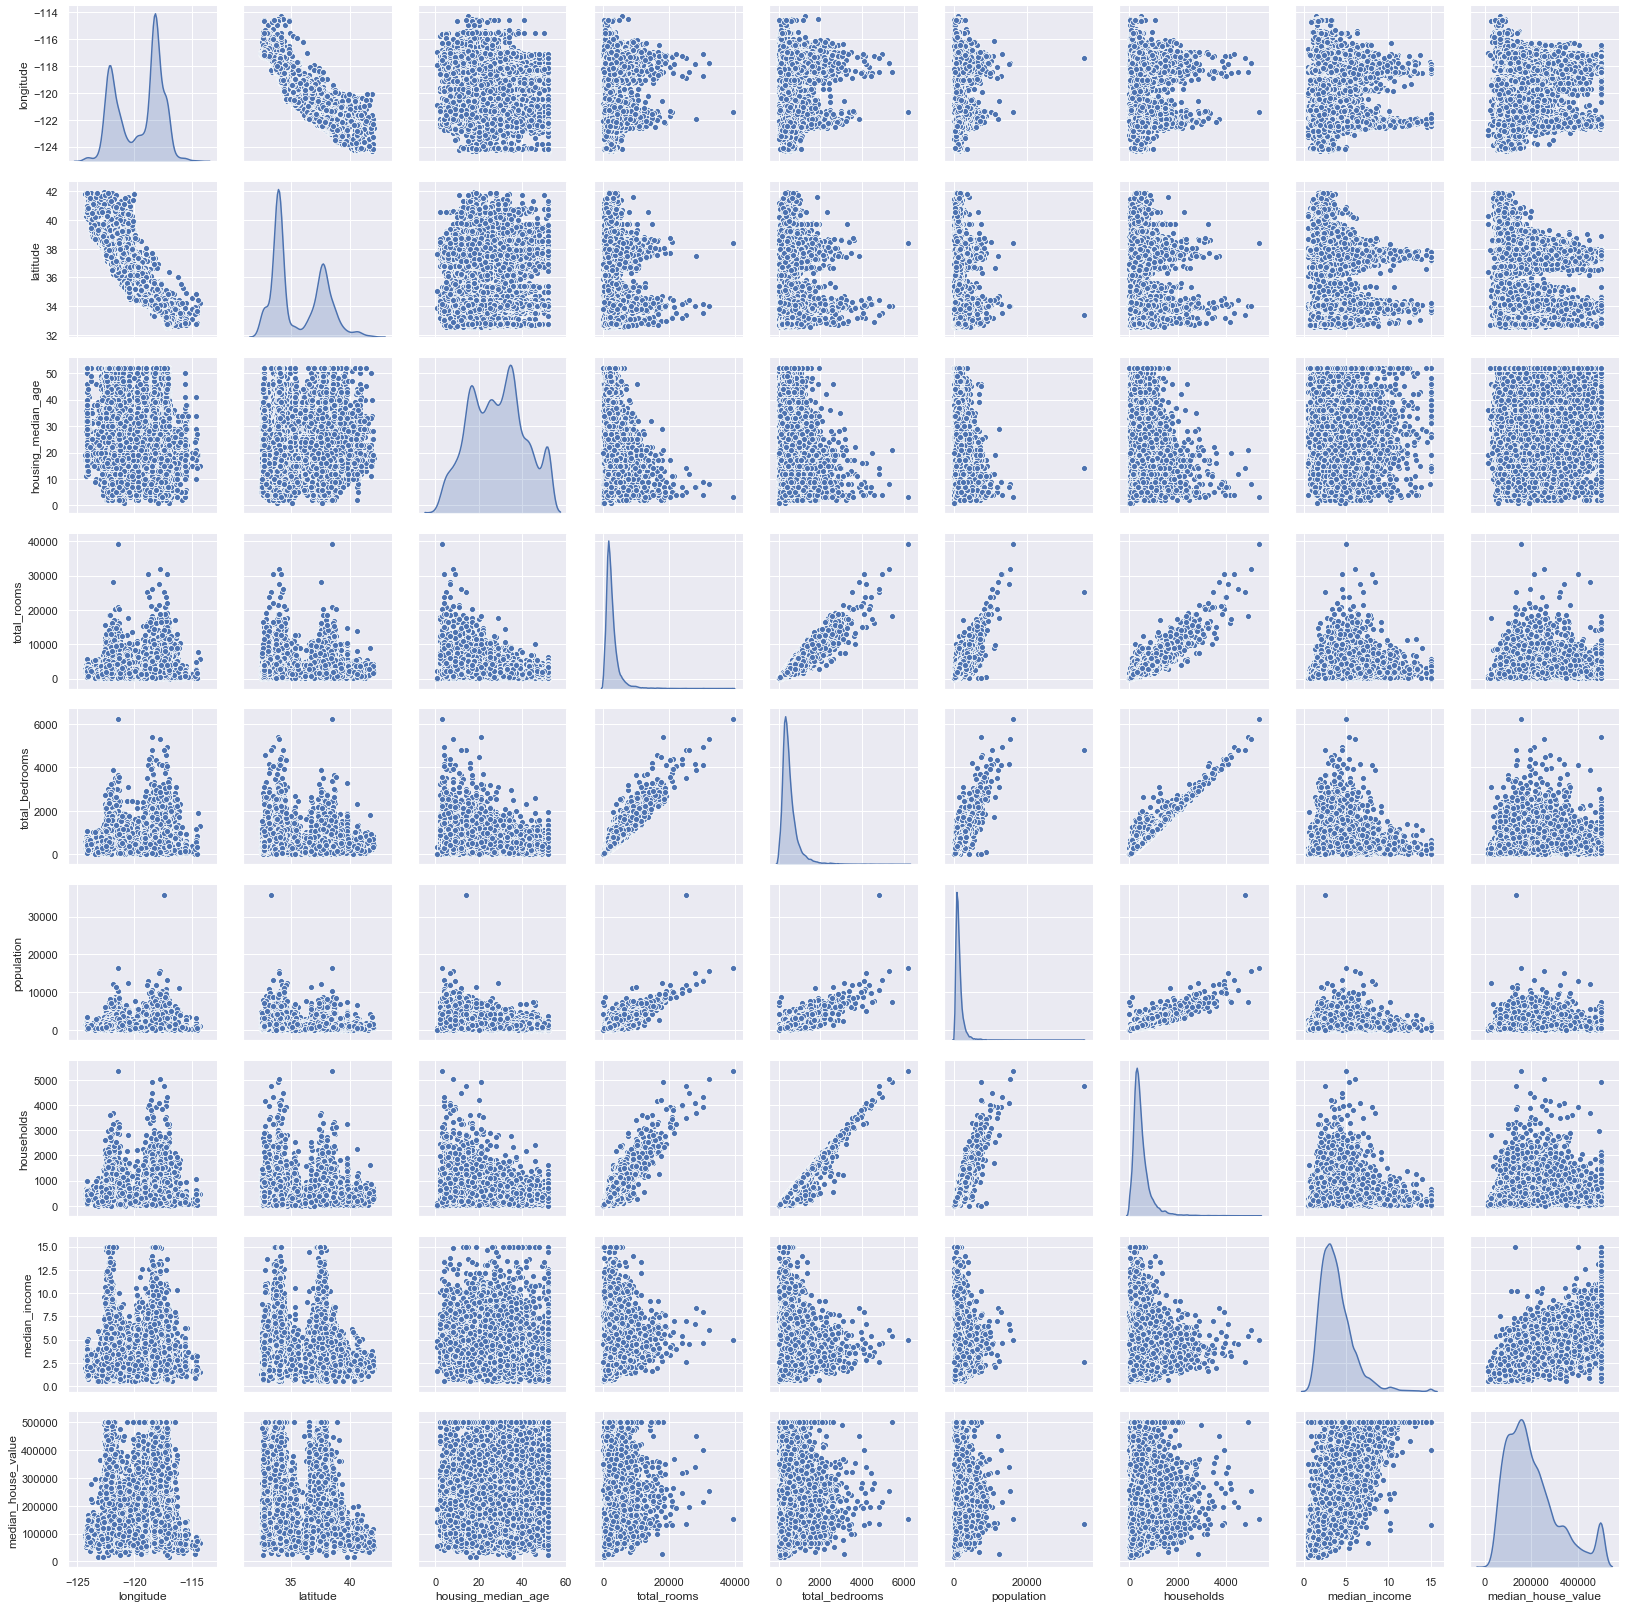

In [51]:
sns.pairplot(data = house, diag_kind = 'kde')

The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot:

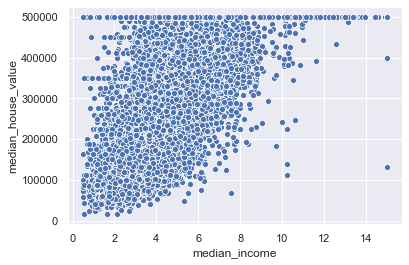

In [55]:
sns.scatterplot(data = house, x = 'median_income', y = 'median_house_value',)

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this
plot reveals other less obvious straight lines: a horizontal line around 450,000,
another around 350,000, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

## Experiments with attribute combinations

One last thing you may want to do before actually preparing the data for Machine
Learning algorithms is to try out various attribute combinations. For example, the
total number of rooms in a district is not very useful if you don’t know how many
households there are. What you really want is the number of rooms per household.
Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also
seems like an interesting attribute combination to look at. Let’s create these new
attributes:

In [56]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [59]:
house['room_per_household'] = house['total_rooms'] / house['households']
house['bed_per_room'] = house['total_bedrooms'] / house['total_rooms']
house['pop_per_household'] = house['population'] / house['households']


Let's look at the correlation of <code>median_house_value</code>:

In [60]:
house.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687752
room_per_household    0.145300
total_rooms           0.136422
housing_median_age    0.106985
households            0.066340
total_bedrooms        0.050081
pop_per_household    -0.022435
population           -0.024622
bed_per_household    -0.043514
longitude            -0.047586
latitude             -0.142814
bed_per_room         -0.258861
Name: median_house_value, dtype: float64

<b>Analysis:</b><br>
Hey, not bad! The new <code>bedrooms_per_room</code> attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive t

## Prepare the Data for Machine Learning Algoritmns

### Handling missing data

3 options:
<ol>
    <li>Drop missing variables: <code>train_set.drop(columns = 'total_bedrooms')</code></li>
    <li>Drop observations having missing variables: <code>train_set.dropna()</code></li>
    <li>Imputation: <code>df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace = True)</code></li>
</ol>

In [75]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

housing = train_set.copy()
housing.drop(columns = ['ocean_proximity', 'median_house_value'], inplace = True)
housing_labels = train_set['median_house_value'].copy()
imputer.fit(housing)
imputer.statistics_


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([-118.52  ,   34.26  ,   29.    , 2120.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [63]:
housing.median()

longitude               -118.5200
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2120.5000
total_bedrooms           433.0000
population              1164.0000
households               408.0000
median_income              3.5409
median_house_value    179700.0000
dtype: float64

## Handling Categorical Data

In [78]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
onehot = encoder.fit_transform(train_set[['ocean_proximity']])
encoder.get_feature_names()

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

## Custom Transformer

<p>Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need is to create a class and implement three methods: <code>fit()</code>
    (returning self), <code>transform()</code>, and <code>fit_transform()</code>. You can get the last one for
    free by simply adding <code>TransformerMixin</code> as a base class. Also, if you add <code>BaseEstimator</code> as a base class (and avoid *args and **kargs in your constructor) you will get
two extra methods (get_params() and set_params()) that will be useful for auto‐
matic hyperparameter tuning. For example, here is a small transformer class that adds
the combined attributes we discussed earlier:</p>

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, bedrooms_per_room = True):
        self.bedrooms_per_room = True
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        if self.bedrooms_per_room:
            return np.c_[X, population_per_household, rooms_per_household, bedrooms_per_room]
        else:
            return np.c_[X, population_per_household, rooms_per_household]

In [106]:
transformer = AttributeAdder()
transformer.fit(train_set)
result = transformer.transform(train_set.values)
result[:10]

array([[-122.26, 37.38, 28.0, 1103.0, 164.0, 415.0, 154.0, 7.8633,
        500001.0, 'NEAR OCEAN', 2.6948051948051948, 7.162337662337662,
        0.1486854034451496],
       [-118.43, 34.07, 38.0, 3251.0, 656.0, 1251.0, 593.0, 7.7382,
        500001.0, '<1H OCEAN', 2.109612141652614, 5.482293423271501,
        0.20178406644109506],
       [-117.12, 32.8, 29.0, 2863.0, 534.0, 1392.0, 522.0, 3.8719,
        174200.0, 'NEAR OCEAN', 2.6666666666666665, 5.484674329501916,
        0.18651763884037723],
       [-117.06, 34.87, 14.0, 3348.0, 619.0, 1756.0, 557.0, 3.5987,
        91400.0, 'INLAND', 3.1526032315978454, 6.010771992818672,
        0.18488649940262844],
       [-122.36, 37.58, 37.0, 3325.0, 734.0, 1468.0, 692.0, 4.0987,
        434000.0, 'NEAR OCEAN', 2.121387283236994, 4.804913294797688,
        0.22075187969924812],
       [-117.81, 33.75, 25.0, 2365.0, 471.0, 1197.0, 458.0, 3.7031,
        227800.0, '<1H OCEAN', 2.61353711790393, 5.163755458515284,
        0.19915433403805496],


## Feature scaling

<h4><code>MinMaxScaler</code>: $x = \frac{x - min}{max - min}$</h4> 
    <br>scaling values between 0 and 1
    <br>(sensitive to outliers)
<hr>
<h4><code>StandardScaler</code>: $x = \frac{x - \mu}{\sigma}$</h4>
    <br>$\mu = 0, \sigma = 1$
    <br>Standardization does not
bound values to a specific range, which may be a problem for some algorithms (e.g.,
neural networks often expect an input value ranging from 0 to 1)


<span class = 'warning'>NOTE:</span>
<p class = 'note'>
As with all the transformations, it is important to fit the scalers to
the training data only, not to the full dataset (including the test set).
Only then can you use them to transform the training set and the
test set (and new data).
</p>

## Feature Selection

Create a class that select features:

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.features]

## Transformation Pipelines

In [121]:
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
X_train, y_train = train_set.drop(columns = 'median_house_value'), train_set['median_house_value']
X_test, y_test = test_set.drop(columns = 'median_house_value'), test_set['median_house_value']

A pipeline that handle numeric data:

In [122]:
num_feature_names = X_train.columns[:-1].values
cat_feature_names = ['ocean_proximity']

num_pipe = Pipeline([
    ('selector', FeatureSelector(num_feature_names)),
    ('imputer', Imputer(strategy = 'median')),
    ('adder', AttributeAdder()),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('selector', FeatureSelector(cat_feature_names)),
    ('encoder', OneHotEncoder())
])

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<p class = 'note'>How do we union (merge horizontally) the result of <code>num_pipe</code> transformation and <code>cat_pipe</code> transformation?
<p class = 'highlight'><b>Scikit-learn</b> provides a <b><code>FeatureUnion</code></b> for this</p>

In [100]:
%%HTML
<style>
code {
    font-weight: bold;
}
</style>

You give it a list of
transformers (which can be entire transformer pipelines), and when its <code>transform()</code>
method is called it runs each transformer’s <code>transform()</code> method in parallel, waits for
their output, and then concatenates them and returns the result (and of course calling
its <code>fit()</code> method calls all each transformer’s fit() method). 

In [123]:
from sklearn.pipeline import FeatureUnion
pipe = FeatureUnion([
    ('num_pipe', num_pipe),
    ('cat_pipe', cat_pipe)
])


In [125]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)
X_train.shape

(16512, 16)

In [126]:
X_train.toarray()

array([[-1.34061366,  0.81549736, -0.04911198, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.57167919, -0.73324997,  0.7474863 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22575325, -1.32748233,  0.03054785, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.20078859, -1.33684032, -0.92537009, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.51176401, -0.57416414, -1.64230855, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78138233, -0.82682987, -0.28809147, ...,  0.        ,
         0.        ,  0.        ]])

## Select and Train a model

In [127]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
print('Train score: %.2f' % reg.score(X_train, y_train))
print('Test score: %.2f' % reg.score(X_test, y_test))

Train score: 0.65
Test score: 0.65


(0, 600000)

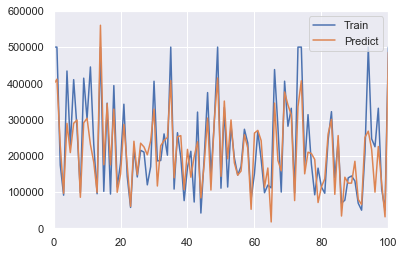

In [144]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)

xt = range(len(y_train))
plt.plot(xt, y_train.values, label = 'Train')
plt.plot(xt, y_train_pred, label = 'Predict')
plt.legend()
plt.xlim(0, 100)
plt.ylim(0, 600000)

In [145]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_train, y_train_pred)
np.sqrt(MSE)

68501.96465501045

<p class = 'note'>It seems that we are <code>underfitting</code>.Let try to use a more powerful mode</p>

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators = 100)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
print('Train score: %.2f' % reg.score(X_train, y_train))
print('Test score: %.2f' % reg.score(X_test, y_test))

Train score: 0.81
Test score: 0.81


## Model Evaluation

In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GradientBoostingRegressor(n_estimators=100), X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')

In [164]:
np.sqrt(-scores)

array([51220.28271478, 52814.68452755, 55994.25195783, 52210.36621925,
       56429.19851679])

## Fine-tune your model

### Grid Search

In [171]:
grid_params = {
    'max_depth' : [2,3],
    'n_estimators' : [100, 200, 300],
    'max_features' : [10, 15]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(GradientBoostingRegressor(), grid_params, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [173]:
np.sqrt(-grid.best_score_)

49853.42592843862

In [174]:
grid.best_params_

{'max_depth': 3, 'max_features': 10, 'n_estimators': 300}

In [175]:
grid.score(X_test, y_test)

-2164579901.462626

# Exercises

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyper‐
parameters such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [178]:
from sklearn.svm import SVR
grid_params = [
    {'kernel' : ['linear'],
     'C' : [.01, .1, 1, 10]},
    {'kernel' : ['rbf'],
     'gamma' : [.01, .1, 1, 10],
     'C' : [1, 100]}
]
grid = GridSearchCV(SVR(), grid_params)
grid.fit(X_train, y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [1, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [180]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [181]:
grid.best_score_

0.4316689036193131

In [184]:
df = pd.DataFrame(grid.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.724930,0.578156,1.294273,0.013452,0.01,linear,NaN,"{'C': 0.01, 'kernel': 'linear'}",-0.034026,-0.062677,-0.069689,-0.055464,0.015427,9
1,5.352528,0.068519,1.294539,0.024766,0.1,linear,NaN,"{'C': 0.1, 'kernel': 'linear'}",-0.024044,-0.053435,-0.060849,-0.046109,0.015893,6
2,5.294830,0.021632,1.290897,0.007109,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.061272,0.029542,0.023286,0.038033,0.016629,4
3,5.165224,0.014404,1.284908,0.013837,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.457769,0.419425,0.417812,0.431669,0.018468,1
4,6.533622,0.028984,2.035552,0.019574,1,rbf,0.01,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",-0.033375,-0.062022,-0.069025,-0.054807,0.015423,8
5,6.320114,0.033172,2.041200,0.006321,1,rbf,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",-0.030602,-0.059369,-0.066795,-0.052255,0.015608,7
6,6.022655,0.027982,2.058477,0.010024,1,rbf,1,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",-0.034397,-0.063196,-0.070085,-0.055892,0.015458,10
7,7.575562,0.062115,2.137937,0.008217,1,rbf,10,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}",-0.035099,-0.063756,-0.070772,-0.056543,0.015431,12
8,6.414532,0.013000,2.034843,0.022489,100,rbf,0.01,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.111089,0.077742,0.072971,0.087267,0.016957,3
9,6.268158,0.047419,2.033234,0.019888,100,rbf,0.1,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.265384,0.226807,0.223778,0.238656,0.018940,2


It seems like as we increace parameter <code>C</code> in <b>Linear kernel</b>, the score tends to increase.Let try a wider range for parameter <code>C</code> when <code>kernel = 'linear'</code>

<p class = 'box'>Try replacing <code>GridSearchCV</code> with <code>RandomizedSearchCV</code>.</p>

In [202]:
from sklearn.model_selection import RandomizedSearchCV
RandomizedSearchCV?